**Audio Preprocessing**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd
from itertools import cycle
from PIL import Image
import zipfile
from glob import glob
import ipywidgets as widgets

In [174]:
import os
print(os.getcwd())

/home/jovyan/work/Audio Preprocessing


In [175]:
import os
tamil_path = '/home/jovyan/work/Audio Preprocessing/Dataset'  # Path to the Tamil audio files

In [176]:
tamil_files = os.listdir(tamil_path) # List all files in the directory
tmp3_files = [file for file in tamil_files if file.endswith('.mp3')] # Filter only .mp3 files

In [177]:
#tmp3_files #It gives the all audio files

In [178]:
print(f"Number of .mp3 files in Tamil folder: {len(tmp3_files)}") # Print the count

Number of .mp3 files in Tamil folder: 50


In [179]:
total_size_bytes = 0 # Initialize total size
for file in os.listdir(tamil_path):  # Iterate through files
    if file.endswith('.mp3'):
        file_path = os.path.join(tamil_path, file)
        total_size_bytes += os.path.getsize(file_path)
total_size_mb = total_size_bytes / (1024 * 1024)  # Convert bytes to megabytes (MB)
print(f"Total size of .mp3 files in Tamil folder: {total_size_mb:.2f} MB")

Total size of .mp3 files in Tamil folder: 3.84 MB


In [180]:
selected_files = [f for f in os.listdir(tamil_path) if f.endswith('.mp3')][:10] # Pick a few files (e.g., first 10)

In [181]:
selected_files

['7179.mp3',
 '6280.mp3',
 '8051.mp3',
 '3282.mp3',
 '8142.mp3',
 '8616.mp3',
 '9740.mp3',
 '8106.mp3',
 '3614.mp3',
 '4920.mp3']

In [182]:
#zip_path = '/kaggle/working/tamil_audio_sample.zip' # Create a zip file
#with zipfile.ZipFile(zip_path, 'w') as zipf:
#    for file in selected_files:
#        zipf.write(os.path.join(tamil_path, file), arcname=file)
#print("Zip file created:", zip_path)

In [183]:
audio_path = os.path.join(tamil_path, tmp3_files[0]) # Pick the required mp3 file and build full path

In [184]:
ipd.Audio(filename=audio_path) # Play the audio file

In [185]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [186]:
Audio_files_path= glob("/home/jovyan/work/Audio Preprocessing/Dataset/*.mp3")

In [187]:
a_f= Audio_files_path[36]

In [188]:
ipd.Audio(filename=a_f)

In [189]:
y, sr = librosa.load(a_f)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-3.2684966e-13  1.1866064e-12  2.0818902e-12  1.5631940e-13
  4.5474735e-13 -4.2632564e-13  9.9475983e-13 -5.4001248e-13
 -3.2684966e-13 -3.6237680e-13]
shape y: (109752,)
sr: 22050


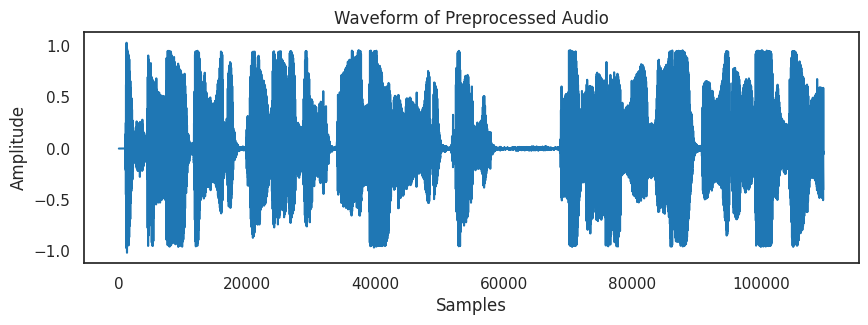

In [190]:
plt.figure(figsize=(10, 3))
plt.plot(y)
plt.title("Waveform of Preprocessed Audio")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

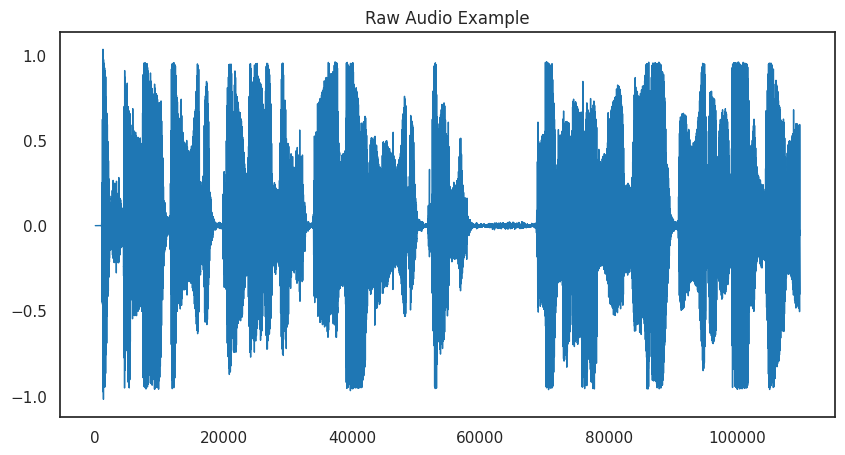

In [191]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

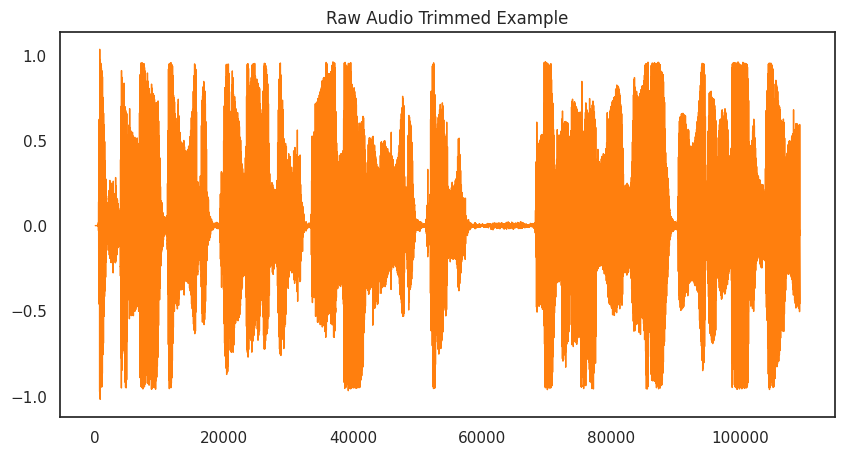

In [200]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

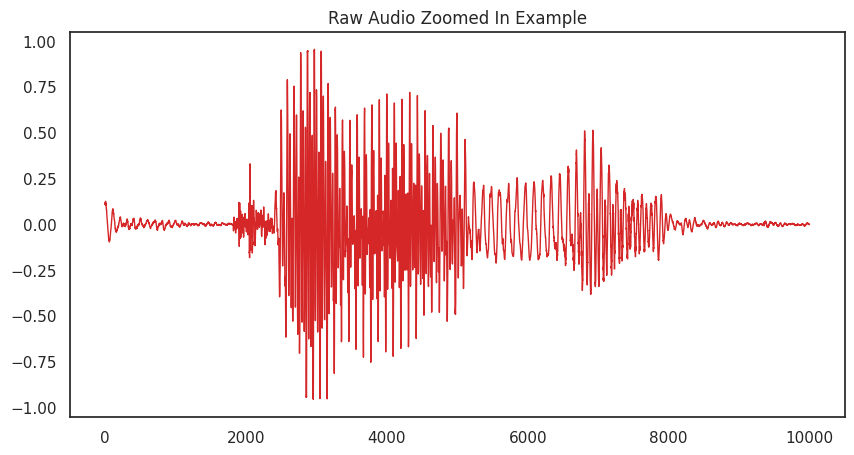

In [201]:
pd.Series(y[50000:60000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[3])
plt.show()

Spectrogram

In [205]:
D = librosa.stft(y) #After this , output represents shape of the spectrogram #short term fourier transformer
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 215)

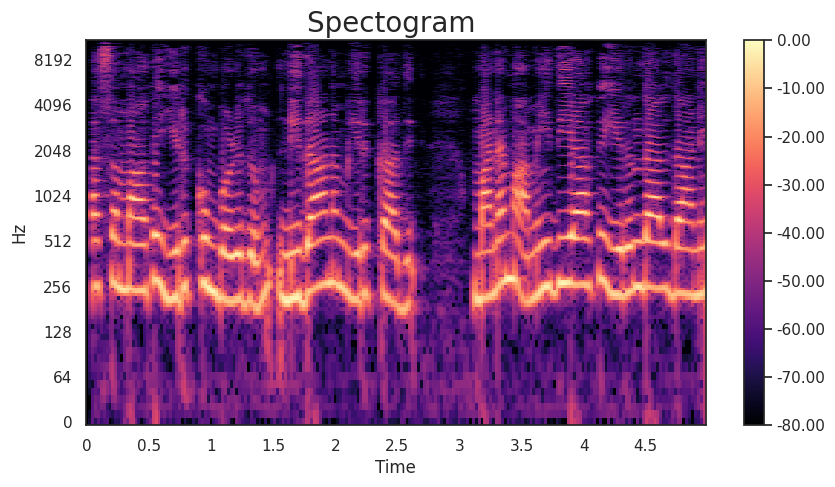

In [206]:
fig, ax = plt.subplots(figsize=(10, 5)) # Plot the transformed audio data
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram ', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

**Melspectrogram**

In [207]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

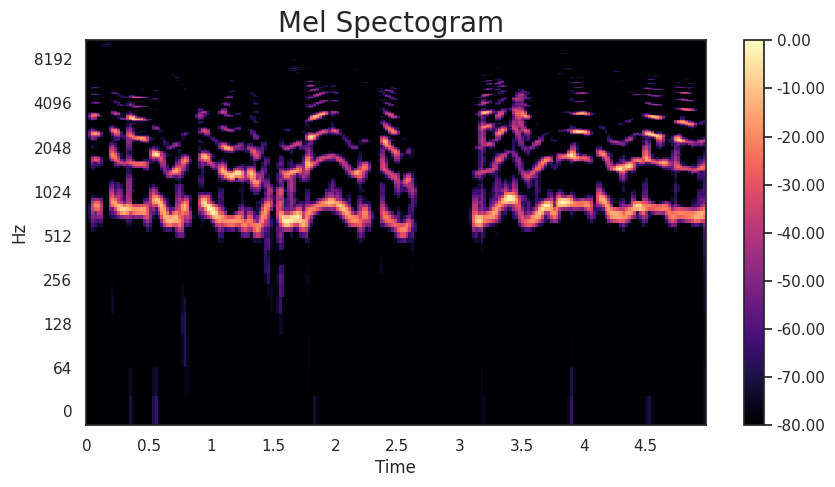

In [208]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram ', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

**Preprocessing all audio files**

In [209]:
preprocessed_data = [] #create an empty list to store processed audio files

In [210]:
# List all .mp3 files
audio_files = [os.path.join(tamil_path, f) for f in os.listdir(tamil_path) if f.endswith('.mp3')]

In [211]:
for file in audio_files:
    try:
        y, sr = librosa.load(file, sr=22050, mono=True) # Load audio (resample to 22050 Hz, convert to mono)
        y_trimmed, _ = librosa.effects.trim(y) # Trim silence
        # Normalize to -1.0 to +1.0
        y_normalized = y_trimmed / np.max(np.abs(y_trimmed)) if np.max(np.abs(y_trimmed)) != 0 else y_trimmed
        preprocessed_data.append((file, y_normalized, sr)) # Optional: Save or append to a list
        print(f" Processed: {os.path.basename(file)}")
    except Exception as e:
        print(f" Error processing {file}: {e}")
print("\n All files preprocessed successfully.")

 Processed: 7179.mp3
 Processed: 6280.mp3
 Processed: 8051.mp3
 Processed: 3282.mp3
 Processed: 8142.mp3
 Processed: 8616.mp3
 Processed: 9740.mp3
 Processed: 8106.mp3
 Processed: 3614.mp3
 Processed: 4920.mp3
 Processed: 4104.mp3
 Processed: 11507.mp3
 Processed: 8118.mp3
 Processed: 4864.mp3
 Processed: 12393.mp3
 Processed: 5283.mp3
 Processed: 5702.mp3
 Processed: 15592.mp3
 Processed: 13802.mp3
 Processed: 5313.mp3
 Processed: 14944.mp3
 Processed: 12959.mp3
 Processed: 17120.mp3
 Processed: 13738.mp3
 Processed: 17932.mp3
 Processed: 11014.mp3
 Processed: 14313.mp3
 Processed: 19894.mp3
 Processed: 18073.mp3
 Processed: 23005.mp3
 Processed: 20068.mp3
 Processed: 21017.mp3
 Processed: 20772.mp3
 Processed: 19796.mp3
 Processed: 19496.mp3
 Processed: 21055.mp3
 Processed: 26161.mp3
 Processed: 23246.mp3
 Processed: 23694.mp3
 Processed: 17849.mp3
 Processed: 3106.mp3
 Processed: 24505.mp3
 Processed: 25264.mp3
 Processed: 26317.mp3
 Processed: 25308.mp3
 Processed: 24416.mp3
 Proc

In [212]:
# Save trimmed and normalized version
sf.write("preprocessed_1.wav", y_normalized, sr)

In [213]:
from IPython.display import Audio
file, y_normalized, sr = preprocessed_data[36] # Play the first preprocessed audio sample
Audio(data=y_normalized, rate=sr)

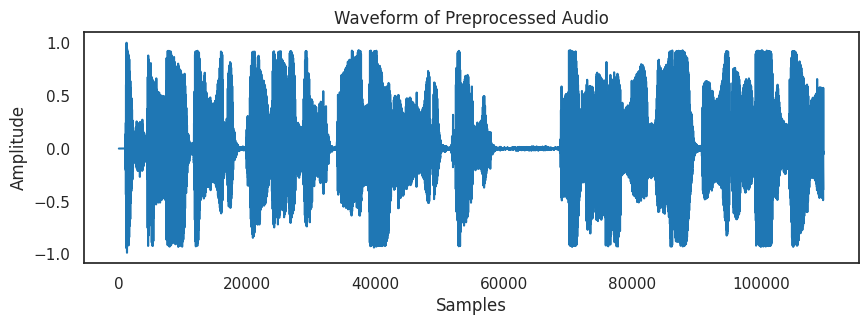

In [215]:
plt.figure(figsize=(10, 3))
plt.plot(y_normalized)
plt.title("Waveform of Preprocessed Audio")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [216]:
# Save to disk
import soundfile as sf
sf.write("preprocessed_1.wav", y_normalized, sr)
Audio("preprocessed_1.wav") # Then play it from file

**Convert One Preprocessed File to Mel-Spectrogram**

In [217]:
file, y, sr = preprocessed_data[36] # Use the first file 

In [218]:
# Compute mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

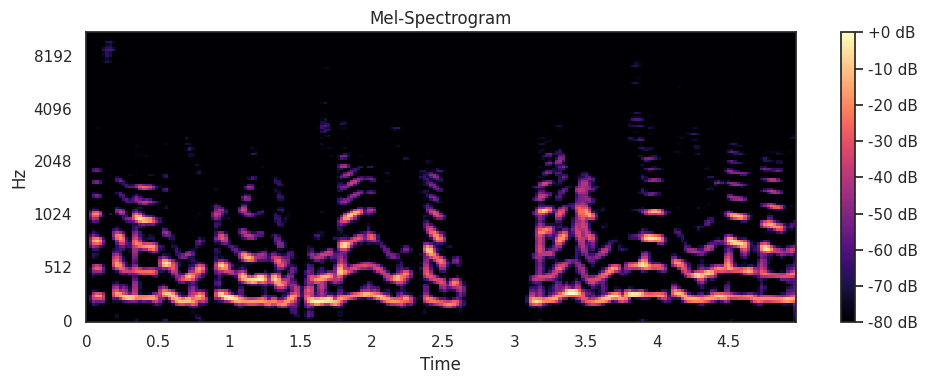

In [219]:
# Plot mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

In [220]:
# Paths
raw_path = '/home/jovyan/work/Audio Preprocessing/Dataset'
save_wav_path = '/home/jovyan/work/Audio Preprocessing/ProcessedAudio'
mfcc_save_path = '/home/jovyan/work/Audio Preprocessing/Features/MFCCs'
mel_save_path = '/home/jovyan/work/Audio Preprocessing/Features/MelSpectrograms'

In [221]:
# Create folders if not exist
os.makedirs(save_wav_path, exist_ok=True)
os.makedirs(mfcc_save_path, exist_ok=True)
os.makedirs(mel_save_path, exist_ok=True)

In [222]:
audio_files = [f for f in os.listdir(raw_path) if f.endswith('.mp3')] # Get all mp3 files

In [223]:
print(f"Found {len(audio_files)} audio files.\n")

Found 50 audio files.



In [224]:
# Process each file
for file in audio_files:
    try:
        file_path = os.path.join(raw_path, file)
        
        # 1. Load and preprocess
        y, sr = librosa.load(file_path, sr=22050, mono=True)
        y_trimmed, _ = librosa.effects.trim(y)
        y_normalized = y_trimmed / np.max(np.abs(y_trimmed)) if np.max(np.abs(y_trimmed)) != 0 else y_trimmed

        # 2. Save preprocessed .wav
        save_path = os.path.join(save_wav_path, file.replace('.mp3', '.wav'))
        sf.write(save_path, y_normalized, sr)

        # 3. Extract MFCCs
        mfcc = librosa.feature.mfcc(y=y_normalized, sr=sr, n_mfcc=13)
        mfcc_path = os.path.join(mfcc_save_path, file.replace('.mp3', '.npy'))
        np.save(mfcc_path, mfcc)

        # 4. Extract Mel-Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y_normalized, sr=sr, n_mels=128)
        mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
        mel_path = os.path.join(mel_save_path, file.replace('.mp3', '.npy'))
        np.save(mel_path, mel_db)

        print(f"Processed: {file}")

    except Exception as e:
        print(f"Error with {file}: {e}")

Processed: 7179.mp3
Processed: 6280.mp3
Processed: 8051.mp3
Processed: 3282.mp3
Processed: 8142.mp3
Processed: 8616.mp3
Processed: 9740.mp3
Processed: 8106.mp3
Processed: 3614.mp3
Processed: 4920.mp3
Processed: 4104.mp3
Processed: 11507.mp3
Processed: 8118.mp3
Processed: 4864.mp3
Processed: 12393.mp3
Processed: 5283.mp3
Processed: 5702.mp3
Processed: 15592.mp3
Processed: 13802.mp3
Processed: 5313.mp3
Processed: 14944.mp3
Processed: 12959.mp3
Processed: 17120.mp3
Processed: 13738.mp3
Processed: 17932.mp3
Processed: 11014.mp3
Processed: 14313.mp3
Processed: 19894.mp3
Processed: 18073.mp3
Processed: 23005.mp3
Processed: 20068.mp3
Processed: 21017.mp3
Processed: 20772.mp3
Processed: 19796.mp3
Processed: 19496.mp3
Processed: 21055.mp3
Processed: 26161.mp3
Processed: 23246.mp3
Processed: 23694.mp3
Processed: 17849.mp3
Processed: 3106.mp3
Processed: 24505.mp3
Processed: 25264.mp3
Processed: 26317.mp3
Processed: 25308.mp3
Processed: 24416.mp3
Processed: 23677.mp3
Processed: 26686.mp3
Processed

**Plot MFCC**

In [225]:
mfcc_data = np.load('/home/jovyan/work/Audio Preprocessing/Features/MFCCs/19082.npy')
print(mfcc_data.shape)  # (13, time_steps)

(13, 215)


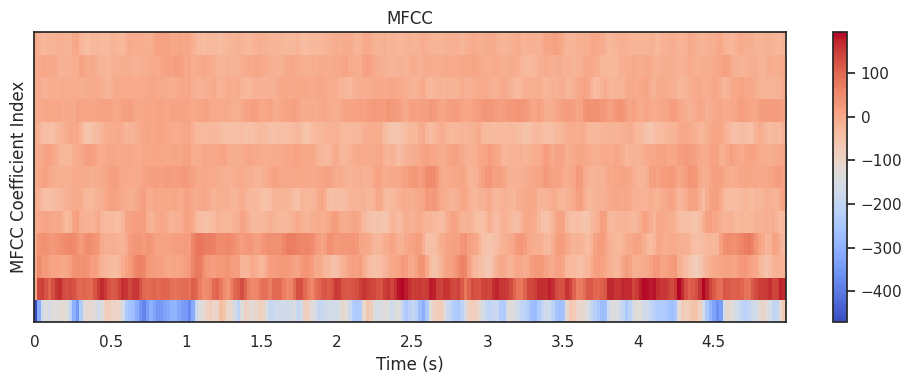

In [226]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.ylabel("MFCC Coefficient Index")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

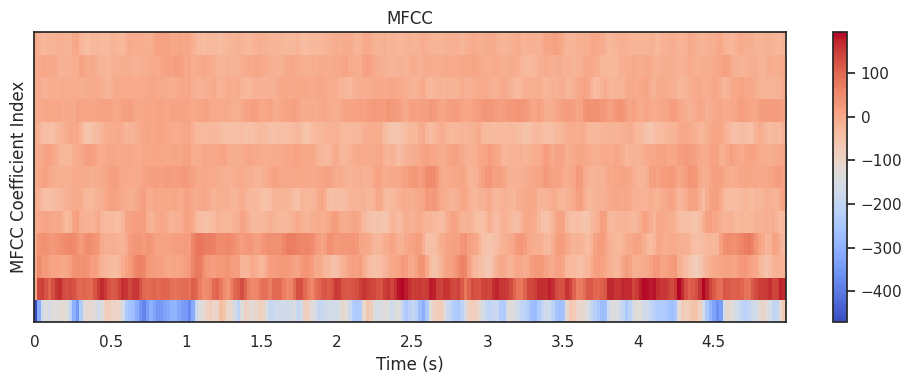

In [227]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_data, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.ylabel("MFCC Coefficient Index")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

**Plot mel spectrogram**

In [228]:
mel_spec = np.load('/home/jovyan/work/Audio Preprocessing/Features/MelSpectrograms/19082.npy')
print(mel_spec.shape)  # (13, time_steps)

(128, 215)


In [229]:
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

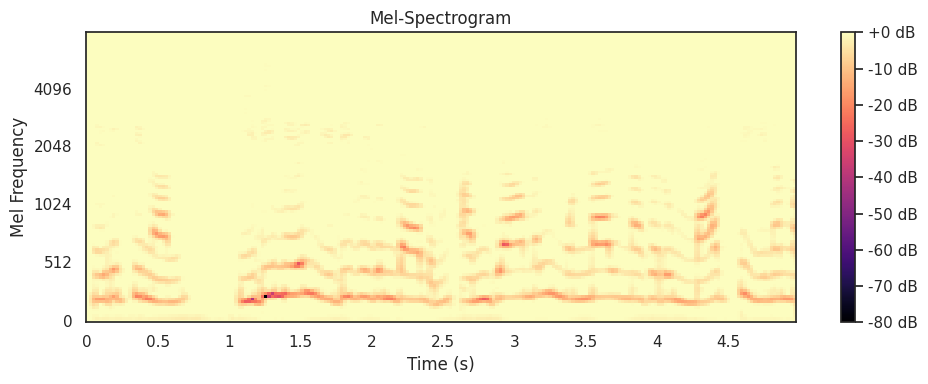

In [230]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()

In [231]:
mfcc_images = '/home/jovyan/work/Audio Preprocessing/MFCC_Images'
mel_spec_images = '/home/jovyan/work/Audio Preprocessing/MelSpec_Images'

In [232]:
os.makedirs(mfcc_images, exist_ok=True)
os.makedirs(mel_spec_images, exist_ok=True)

In [233]:
file_base = os.path.splitext(file)[0]

In [234]:
plt.savefig(os.path.join(mfcc_images, f'{file_base}_mfcc.png'))
plt.savefig(os.path.join(mel_spec_images, f'{file_base}_melspec.png'))

<Figure size 640x480 with 0 Axes>

**Saving all MFCCs and Mel Specs**

In [235]:
for file in audio_files:
    try:
        file_path = os.path.join(tamil_path, file)
        file_base = os.path.splitext(file)[0]

        # Load audio
        y, sr = librosa.load(file_path, sr=22050, mono=True)
        y, _ = librosa.effects.trim(y)
        y = y / np.max(np.abs(y)) if np.max(np.abs(y)) != 0 else y

        # ---------- MFCC ----------
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
        plt.ylabel('MFCC Coefficient Index')
        plt.xlabel('Time (s)')
        plt.tight_layout()
        plt.savefig(os.path.join(mfcc_images, f'{file_base}_mfcc.png'))
        plt.close()

        # ---------- Mel-Spectrogram ----------
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-Spectrogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Mel Frequency')
        plt.tight_layout()
        plt.savefig(os.path.join(mel_spec_images, f'{file_base}_melspec.png'))
        plt.close()

        print(f"Saved MFCC and Mel-Spectrogram for {file}")

    except Exception as e:
        print(f"Error processing {file}: {e}")

Saved MFCC and Mel-Spectrogram for 7179.mp3
Saved MFCC and Mel-Spectrogram for 6280.mp3
Saved MFCC and Mel-Spectrogram for 8051.mp3
Saved MFCC and Mel-Spectrogram for 3282.mp3
Saved MFCC and Mel-Spectrogram for 8142.mp3
Saved MFCC and Mel-Spectrogram for 8616.mp3
Saved MFCC and Mel-Spectrogram for 9740.mp3
Saved MFCC and Mel-Spectrogram for 8106.mp3
Saved MFCC and Mel-Spectrogram for 3614.mp3
Saved MFCC and Mel-Spectrogram for 4920.mp3
Saved MFCC and Mel-Spectrogram for 4104.mp3
Saved MFCC and Mel-Spectrogram for 11507.mp3
Saved MFCC and Mel-Spectrogram for 8118.mp3
Saved MFCC and Mel-Spectrogram for 4864.mp3
Saved MFCC and Mel-Spectrogram for 12393.mp3
Saved MFCC and Mel-Spectrogram for 5283.mp3
Saved MFCC and Mel-Spectrogram for 5702.mp3
Saved MFCC and Mel-Spectrogram for 15592.mp3
Saved MFCC and Mel-Spectrogram for 13802.mp3
Saved MFCC and Mel-Spectrogram for 5313.mp3
Saved MFCC and Mel-Spectrogram for 14944.mp3
Saved MFCC and Mel-Spectrogram for 12959.mp3
Saved MFCC and Mel-Spectro

In [236]:
# List image files
mfcc_image = [f for f in os.listdir(mfcc_images) if f.endswith('.png')]

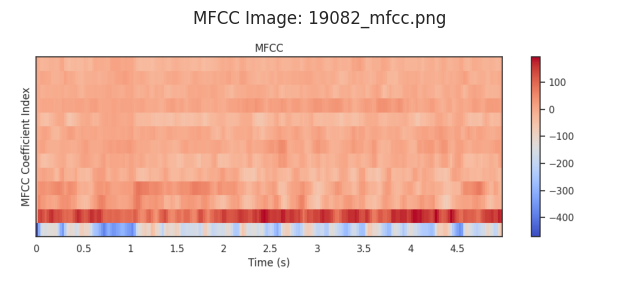

In [237]:
# Load the first image
if mfcc_image:
    image_path = os.path.join(mfcc_images, mfcc_image[0])
    img = Image.open(image_path)

    # Display the image
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"MFCC Image: {mfcc_image[0]}")
    plt.show()
else:
    print("No MFCC images found in the folder.")

In [238]:
# List all PNG images in that folder
mel_images = [f for f in os.listdir(mel_spec_images) if f.endswith('.png')]

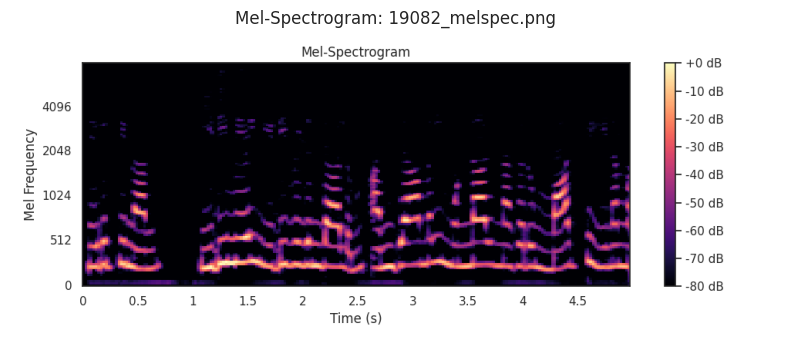

In [239]:
# Display the first image
if mel_images:
    image_path = os.path.join(mel_spec_images, mel_images[0])
    img = Image.open(image_path)

    # Show image
    plt.figure(figsize=(10, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Mel-Spectrogram: {mel_images[0]}")
    plt.show()
else:
    print(" No Mel-Spectrogram images found in the folder.")